In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from preprocessing.data_loader import DataLoader
import matplotlib.gridspec as gridspec

In [2]:
WISDM_LAB_DATA = '../data/wisdm_lab/WISDM_ar_v1.1_raw.txt'
MOTION_SENSE_DATA = '../data/motion_sense'
RUN_WALK_DATA = '../data/run_walk/dataset.csv'

## _Load the data_

WISDM Lab Data: 
> - sampling rate = 20Hz
> - labels = Jogging, Walking, Upstairs, Downstairs, Sitting, Standing
> - device = Android (front pocket)

MotionSense Data:
> - sampling rate = 50Hz
> - labels = Jogging, Walking, Upstairs, Downstairs, Sitting, Standing
> - device = iPhone 6s (front pocket)

RUN/WALK Data:
> - sampling rate = 50Hz (apparently) 
> - labels = Running, Walking
> - device = iPhone 5 (left and right wrist)


In [3]:
data_loader = DataLoader()

In [24]:
wisdm_df = data_loader.load_wisdm_data_as_df(WISDM_LAB_DATA)

Loading data from ../data/wisdm_lab/WISDM_ar_v1.1_raw.txt
WISDM dataset contains 1086465 samples and ['jogging' 'walking' 'upstairs' 'downstairs' 'sitting' 'standing'] as features


In [5]:
wisdm_df.head()

,timestamp,label,acc.x,acc.y,acc.z
0,49105962326000,jogging,-0.694638,12.680544,0.503953
1,49106062271000,jogging,5.012288,11.264028,0.953424
2,49106112167000,jogging,4.903325,10.882658,-0.081722
3,49106222305000,jogging,-0.612916,18.496431,3.023717
4,49106332290000,jogging,-1.184970,12.108489,7.205164


In [6]:
pd.unique(wisdm_df.label)

array(['jogging', 'walking', 'upstairs', 'downstairs', 'sitting',
       'standing'], dtype=object)

In [97]:
motionsense_df = data_loader.load_motion_sense_data_as_df(MOTION_SENSE_DATA)

Loading data from ../data/motion_sense/dataset.csv
MotionSense dataset contains 1412865 samples and ['downstairs' 'upstairs' 'walking' 'standing' 'sit' 'jogging'] as features
Saved data under ../data/motion_sense/dataset.csv


In [8]:
motionsense_df.head()

,timestamp,label,acc.x,acc.y,acc.z
0,0.0,downstairs,0.282683,-0.254346,-0.407670
1,20.0,downstairs,0.256712,0.079154,-0.560291
2,40.0,downstairs,0.253600,0.346680,-0.463275
3,60.0,downstairs,0.411818,0.459372,-0.510293
4,80.0,downstairs,0.311594,0.477305,-0.925049


In [9]:
pd.unique(motionsense_df['label'])

array(['downstairs', 'upstairs', 'walking', 'standing', 'sit', 'jogging'],
      dtype=object)

In [10]:
run_walk_df = data_loader.load_run_walk_data_as_df(RUN_WALK_DATA)

Loading data from ../data/run_walk/dataset.csv
Run/walk dataset contains 88588 samples and ['walking' 'jogging'] as features


In [11]:
pd.unique(run_walk_df['label'])

array(['walking', 'jogging'], dtype=object)

## _Visualize the data_ 

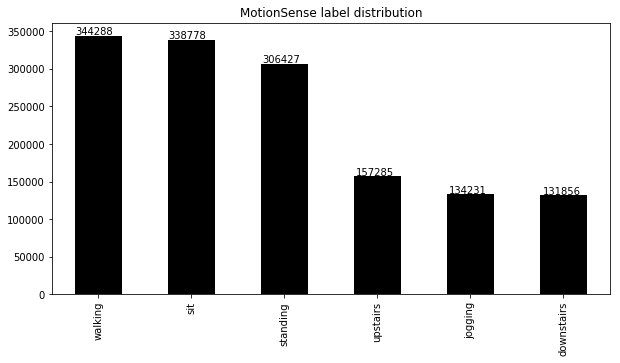

In [12]:
ax = pd.value_counts(motionsense_df['label']).plot(kind='bar', figsize=(10,5), cmap="Greys_r", title="MotionSense label distribution") 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

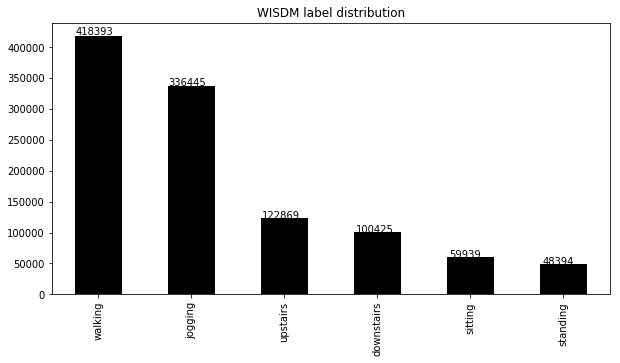

In [13]:
ax = pd.value_counts(wisdm_df['label']).plot(kind='bar', figsize=(10,5), cmap="Greys_r", title="WISDM label distribution") 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

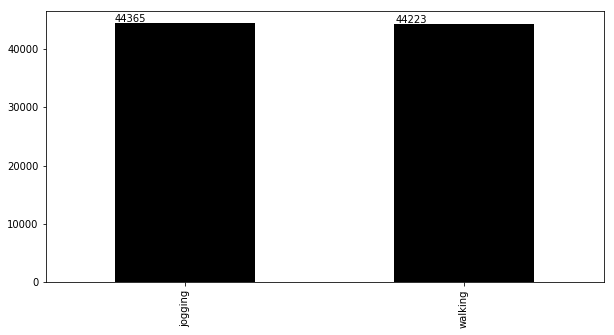

In [14]:
ax = pd.value_counts(run_walk_df['label']).plot(kind='bar', figsize=(10,5), cmap="Greys_r") 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [98]:
# get only run/walk data:
cols = ["walking", "jogging"]
motionsense_df = motionsense_df[(motionsense_df["label"]=="walking") | (motionsense_df["label"]=="jogging")]
wisdm_df = wisdm_df[(wisdm_df["label"]== "walking") | (wisdm_df["label"]=="jogging") ]

In [154]:
def get_activity(df, label, n_samples=200):
    return df[df["label"] == label][:n_samples]

In [155]:
motionsense_walking = get_activity(motionsense_df, "walking") 
motionsense_jogging = get_activity(motionsense_df, "jogging") 

wisdm_walking = get_activity(wisdm_df, "walking")
wisdm_jogging = get_activity(wisdm_df, "jogging")

run_walk_walking = get_activity(run_walk_df, "walking")
run_walk_jogging = get_activity(run_walk_df, "jogging")

/Users/mzu/PycharmProjects/ios_human_activity_recognition/venv/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


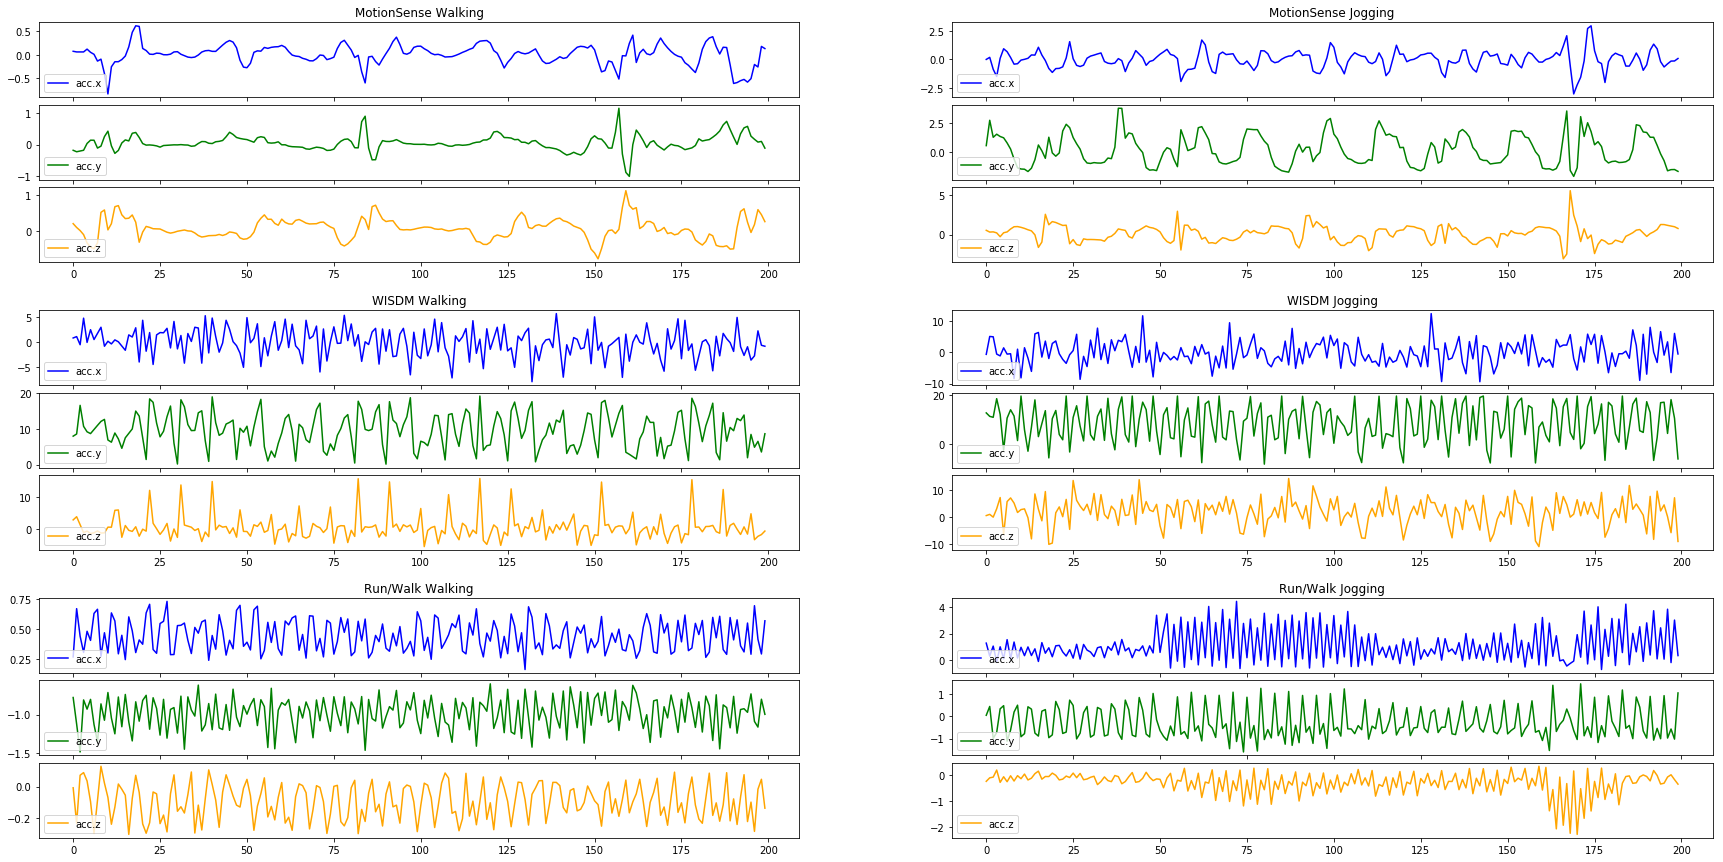

In [160]:
fig = plt.figure(figsize=(30, 15))

outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
accelerations = ["acc.x", "acc.y", "acc.z"]
colors = ['blue', 'green', 'orange']
data = [motionsense_walking, motionsense_jogging, wisdm_walking, wisdm_jogging, run_walk_walking, run_walk_jogging]
titles = ["MotionSense Walking", "MotionSense Jogging", "WISDM Walking", "WISDM Jogging", "Run/Walk Walking", "Run/Walk Jogging"]
for i in range(6):
    inner = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)   
    for j in range(3):
        ax = plt.Subplot(fig, inner[j])
        if j == 0:
            ax.set_title(titles[i])
        ax.plot(range(len(data[i])), data[i][accelerations[j]].values, c=colors[j], label=accelerations[j])
        ax.legend(loc='lower left')
        fig.add_subplot(ax)

fig.show()
plt.savefig("../docs/resources/n_samples_plot.pdf")

In [89]:
def plot_n_ms(label, df, title, hertz=50, milliseconds=10000):
    every_n_ms = 1000.0/hertz
    n_datapoints = int(milliseconds/every_n_ms)
    
    data = df[df['label'] == label][['acc.x', 'acc.y', 'acc.z']][:n_datapoints]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=title)
    for ax in axis:
        ax.legend(loc='lower left')

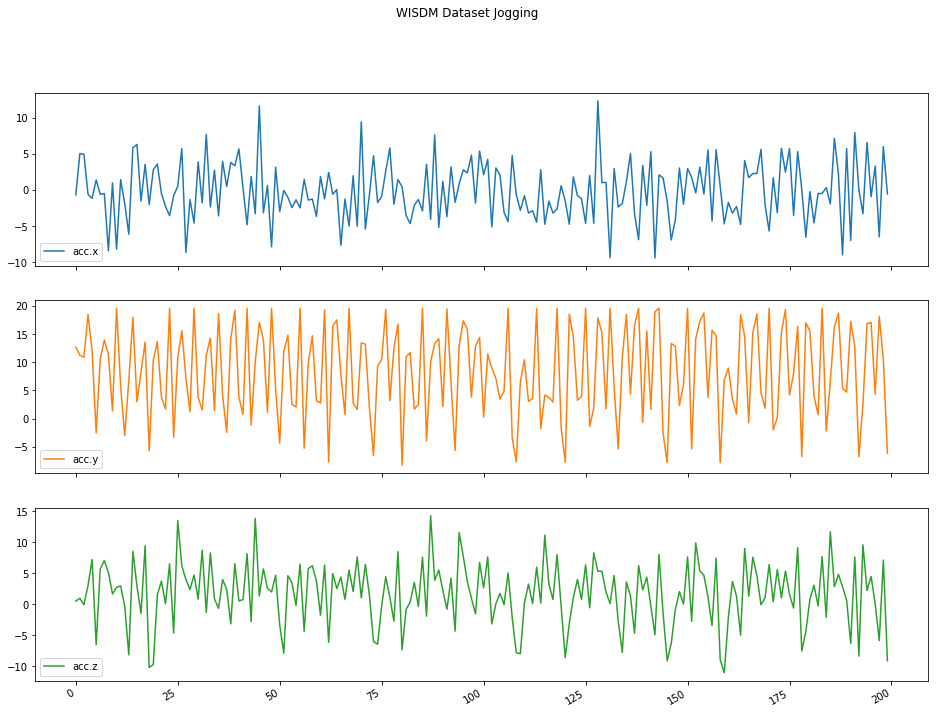

In [92]:
plot_n_ms("jogging", wisdm_df, hertz=20, title="WISDM Dataset Jogging")

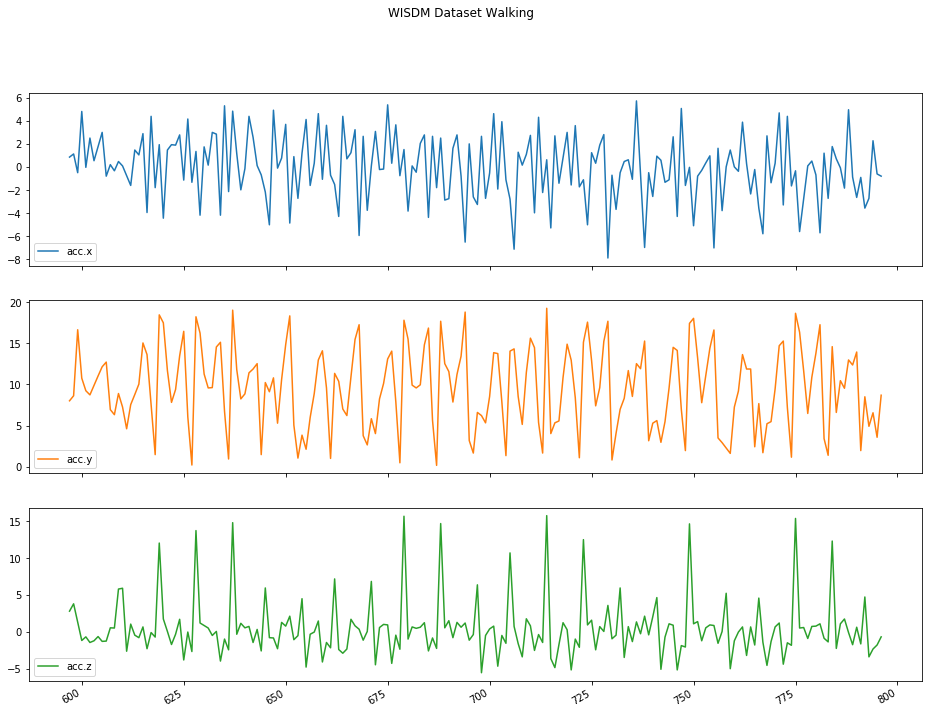

In [139]:
plot_n_ms("walking", wisdm_df, hertz=20, title="WISDM Dataset Walking")

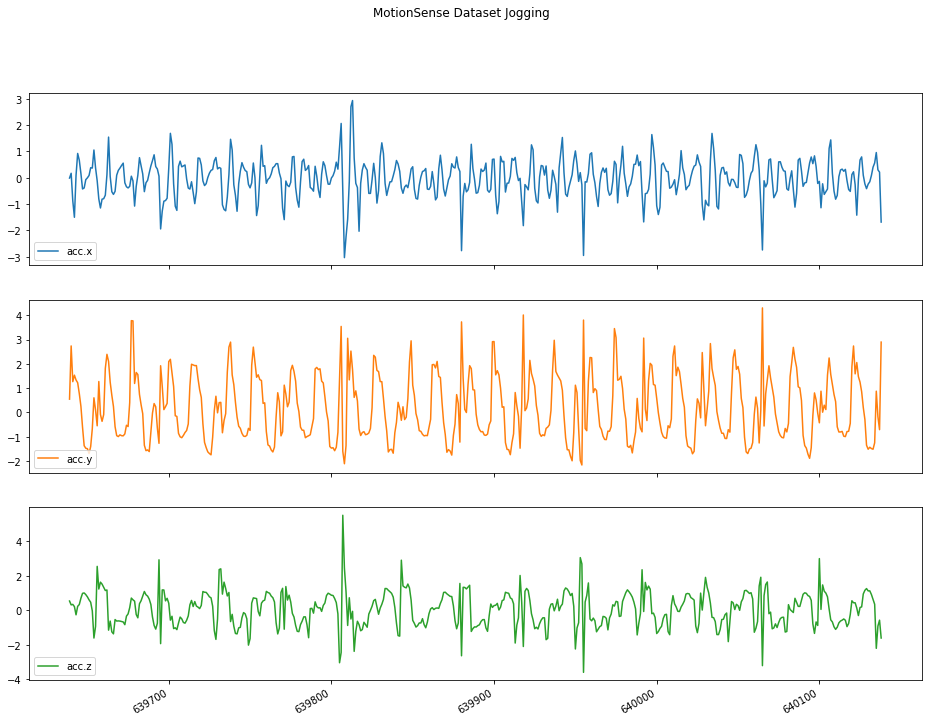

In [140]:
plot_n_ms("jogging", motionsense_df, hertz=50, title="MotionSense Dataset Jogging")

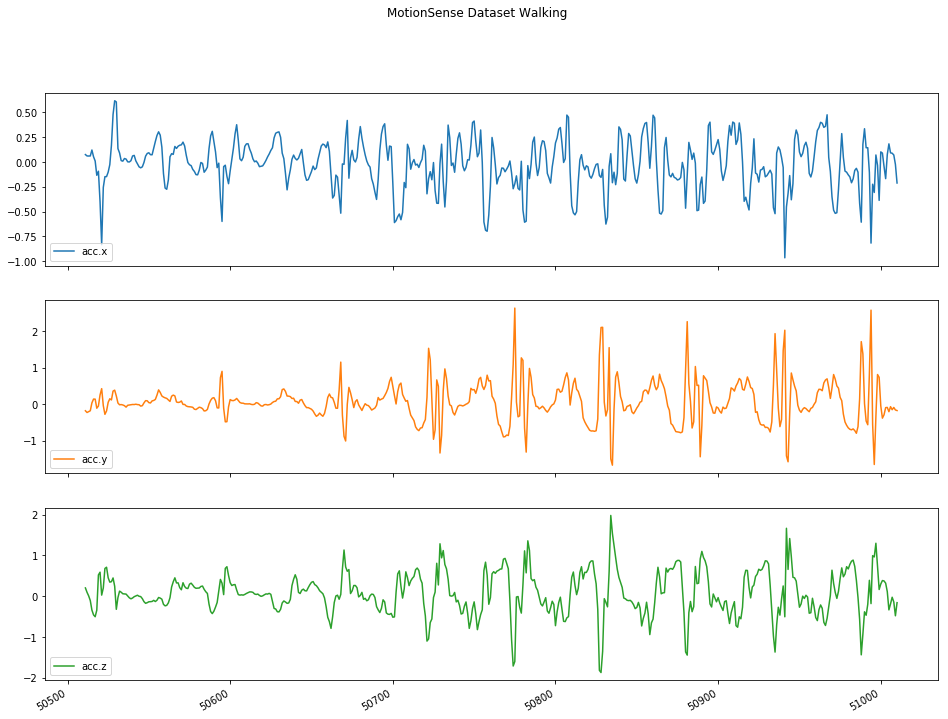

In [141]:
plot_n_ms("walking", motionsense_df, hertz=50, title="MotionSense Dataset Walking")

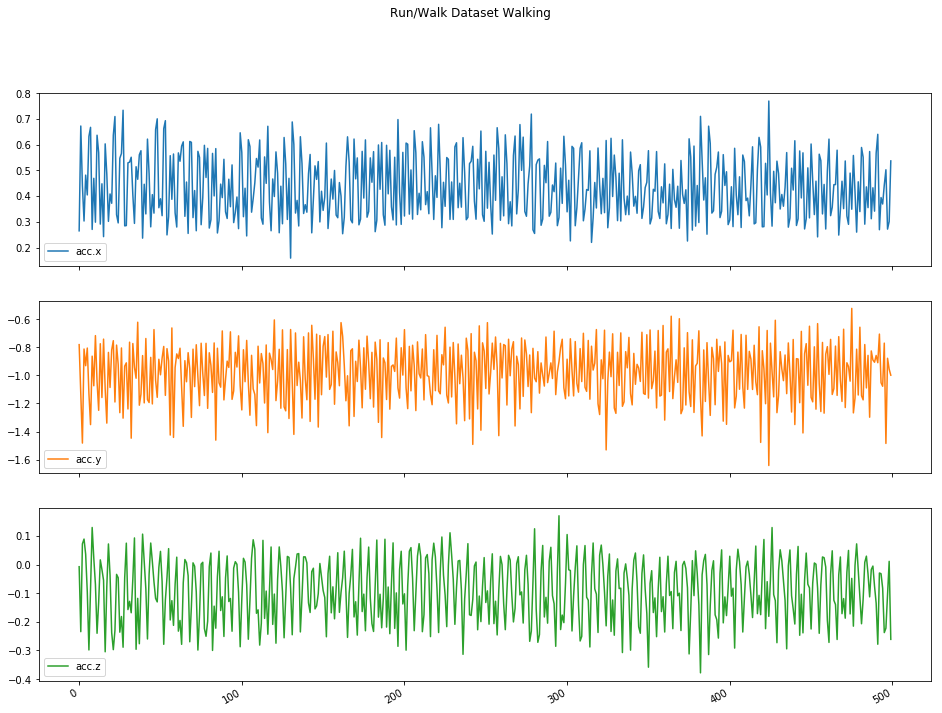

In [144]:
plot_n_ms("walking", run_walk_df, hertz=50, title="Run/Walk Dataset Walking", milliseconds=10000)

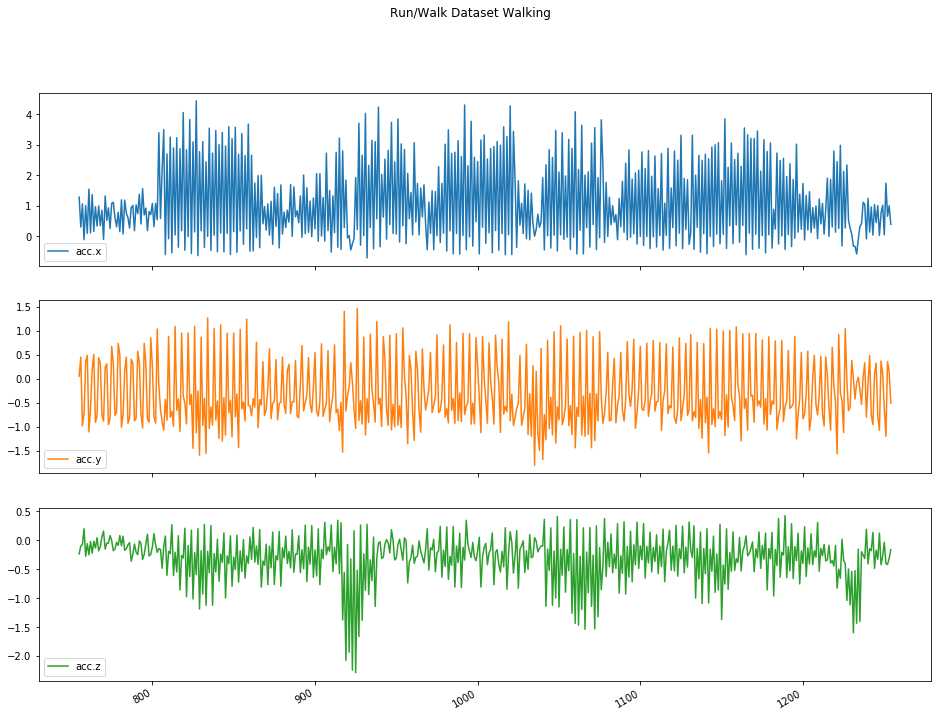

In [145]:
plot_n_ms("jogging", run_walk_df, hertz=50, title="Run/Walk Dataset Walking", milliseconds=10000)

### There is quite some difference between the data collected from the different datasets. What we can directly observe is that Apple's sensor data is ins a smaller range than Android's sensor data. As I am building an iOS App, I will focus on the motionSense and run/walk datasets 

## _Cleaning the data_

## _Building train and test sets_

In [161]:
len(motionsense_df)

478519

In [162]:
len(wisdm_df)

754838

In [163]:
len(run_walk_df)

88588

## _LSTM_ 

## _CNN_